<a href="https://colab.research.google.com/github/rahulrajbo/Supervised-Model/blob/main/Directing_Customers_to_subscription_through_financial_app_behavior_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name-** Directing Customers to subscription through financial app behavior analysis(Classificaiton Problem)

# **Goal of the Project:**

The 'Fintech' Company launch there android and ios mobile base app and want to grow these business. But there is problem how to recommend this app and offer who really want to use it. So for that company decided to give free trial to each and every customer for 24 hours and collect data from the customers. In this scenario some customers purchase the app and some not. According to this data company want to give special offer to the customer who are not interested to buy without offer grow their business.

# **Know About Dataset**

As you can see in fineTech_appData DataFrame, there are 50,000 users data with 12 different features. Let’s know each and every feature in brief.

1. user: Unique ID for each user.

2. first_open: Date (yy-mm-dd) and time (Hour:Minute:Seconds:Milliseconds) of login on app first time.

3. dayofweek: On which day user logon.

0: Sunday

1: Monday

2: Tuesday

3: Wednesday

4: Thursday

5: Friday

6: Saturday

4. Hour: Time of a day in 24-hour format customer login. It is correlated with dayofweek column.

5. age: The age of the registered user.

6. screen_list: The name of multiple screens seen by customers, which are separated by a comma.

7. numscreens: The total number of screens seen by customers.

8. minigame: Tha app contains small games related to finance. If the customer played mini-game then 1 otherwise 0.

9. used_premium_feature: If the customer used the premium feature of the app then 1 otherwise 0.

10. enrolled: If the user bought a premium feature app then 1 otherwise 0.

11. enrolled_date: On the date (yy-mm-dd) and time (Hour:Minute:Seconds:Milliseconds) the user bought a premium features app.

12. liked: Each screen of the app has a like button if the customer likes it then 1 otherwise 0.

# **Import Libraries**

In [104]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
import warnings
warnings.filterwarnings('ignore')

# **Import Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Supervised Model/FineTech_appData.csv')
df_screen = pd.read_csv('/content/drive/MyDrive/Machine Learning/Supervised Model/top_screens.csv')

In [5]:
# No fo rows and columns

df.shape

(50000, 12)

In [6]:
# View of the data from the top

df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [7]:
# View of the data from the bottom

df.tail()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0
49999,27047,2012-12-14 01:22:44.638,4,01:00:00,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",26,0,0,0,NaN,1


The column (screen_list) full information not visible, so for that we used below python code snippet. We print only 5 rows from index 0 to 4 from the screen_list.

In [8]:
for i in range(5):
  print(df.loc[i, 'screen_list'], '\n')

idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login 

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 



In [9]:
# Let's check what is the max no of screen used

df['numscreens'].max()

325

In [10]:
# Let's see the details of the user who used the max no of screen
df[df['numscreens']==df['numscreens'].max()]

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
27660,73887,2012-11-30 15:00:00.359,4,15:00:00,20,"Credit3Dashboard,Credit3Container,Home,Communi...",325,0,0,1,2012-11-30 15:00:01.146,1


**Null Values in the data**

In [11]:
df.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

All columns contain 0 null value except enrolled_date. The enrolled_date column has total 18926 null values.

**Brief Information about the dataset**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


We can see in the output provided by DataFrame.info() method, there are 50,000 entries (rows) from 0 to 49999 and a total of 12 columns.

All columns have 50,000 non-null values except enrolled_date. It has 31,074 non-null. There is a total of 8 columns that contain integer 64 bit (int64) values and the remaining 4 are object type.

The size of fineTech_appData DataFrame is 4.6 MB.


**Numeric variable distribution**

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user,50000.0,186889.72990,107768.520361,13.0,93526.75,187193.5,279984.25,373662.0
dayofweek,50000.0,3.02986,2.031997,0.0,1.00,3.0,5.00,6.0
age,50000.0,31.72436,10.803310,16.0,24.00,29.0,37.00,101.0
numscreens,50000.0,21.09590,15.728812,1.0,10.00,18.0,28.00,325.0
minigame,50000.0,0.10782,0.310156,0.0,0.00,0.0,0.00,1.0
used_premium_feature,50000.0,0.17202,0.377402,0.0,0.00,0.0,0.00,1.0
enrolled,50000.0,0.62148,0.485023,0.0,0.00,1.0,1.00,1.0
liked,50000.0,0.16500,0.371184,0.0,0.00,0.0,0.00,1.0


From the output, we can know more about the dataset.

The mean age of the customer is 31.72.

Only 10.7% of customers played minigame and

only 17.2% customer used premium features of the app,

only likes by 16.5 % cusotmer.

62.1% customer enrolled in the premium app.

**Different Columns**

In [14]:
df.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

**Unique values for each columns**

In [15]:
for i in df.columns:
  print('Unique values in ',i)
  print(df[i].unique())
  print(f'Total number of unique values in {i} is {len(df[i].unique())}')
  print('.'*40)

Unique values in  user
[235136 333588 254414 ... 302367 324905  27047]
Total number of unique values in user is 49874
........................................
Unique values in  first_open
['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']
Total number of unique values in first_open is 49747
........................................
Unique values in  dayofweek
[3 6 1 4 2 0 5]
Total number of unique values in dayofweek is 7
........................................
Unique values in  hour
[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']
Total number of unique values in hour is 24
........................................
Unique values in  ag

In [16]:
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [17]:
# The ‘hour’ column contains object data type, so we converted into integer data type format.
df['hour'] = df.hour.str.slice(start = 1, stop= 3).astype(int)

**DateTime datatypes**

In [18]:
df['first_open'] = [parser.parse(i) if isinstance(i, str) else i for i in df['first_open']]
df['enrolled_date'] = [parser.parse(i) if isinstance(i, str) else i for i in df['enrolled_date']]

In [19]:
df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

**Find Categorical, Discrete and Continuous data**

In [20]:
col_name = df._get_numeric_data().columns
categorical = [x for x in df.columns if x not in col_name]
categorical

['first_open', 'screen_list', 'enrolled_date']

In [21]:
discrete = [x for x in col_name if len(df[x].unique())<=10]
discrete

['dayofweek', 'minigame', 'used_premium_feature', 'enrolled', 'liked']

In [22]:
continuous = [x for x in col_name if x not in discrete]
continuous

['user', 'hour', 'age', 'numscreens']

In [23]:
# To visualize the data need numeric values for that we drop some columns that datatype is the object.

data = df.drop(['user', 'first_open', 'screen_list', 'enrolled_date'], axis= 1)
data.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1


# **Visualization**

**Heat Map using correlation matrix**

Text(0.5, 1.0, 'Heatmap using correlation matrix')

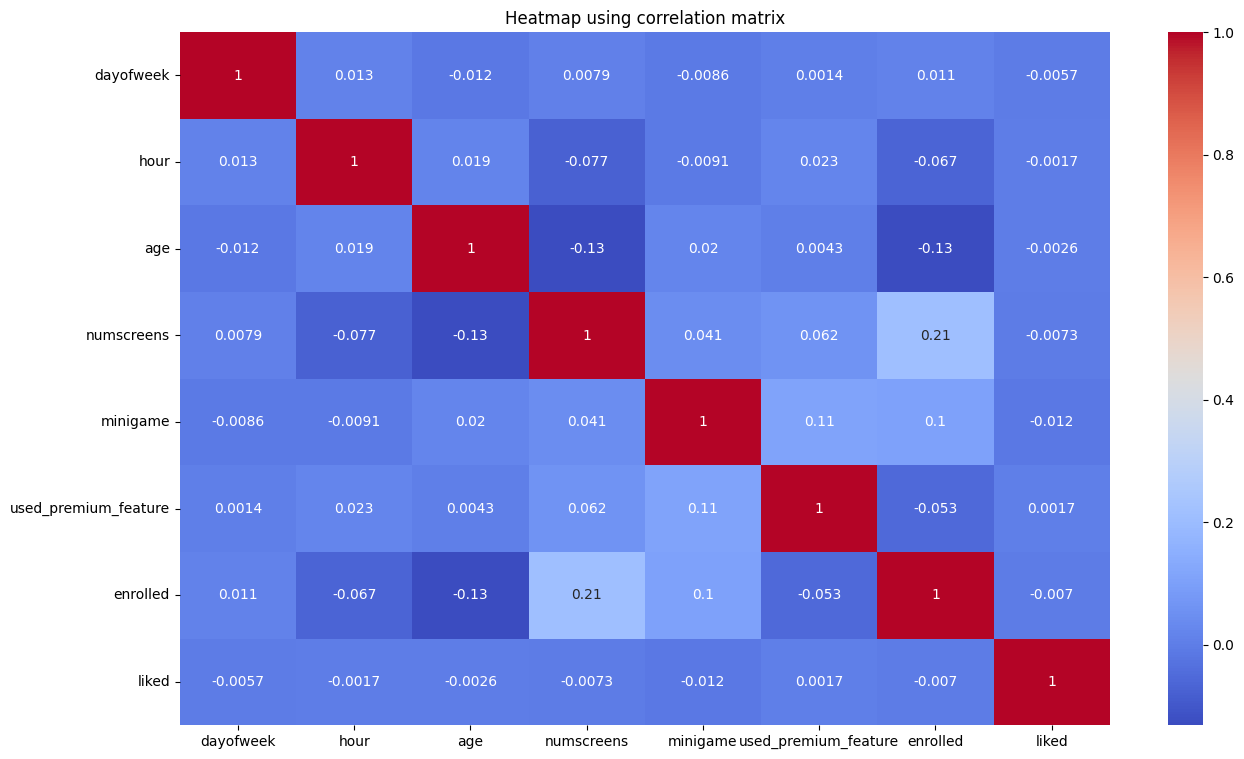

In [24]:
plt.figure(figsize = (15,9))
sns.heatmap(data.corr(), annot = True, cmap= 'coolwarm')
plt.title('Heatmap using correlation matrix')

In the dataset, there is no strong correlation between any features.

There is little correlation between ‘numscreens’ and ‘enrolled’. It means that those customers saw more screen,  they are taking premium app.

There is a slight correlation between ‘minigame’ with ‘enrolled’ and ‘used_premium_feature’.

The slightly negative correlation between ‘age’ with ‘enrolled’ and ‘numscreens’. It means that older customers do not use the premium app and they don’t see multiple screens.

**Pair Plot**

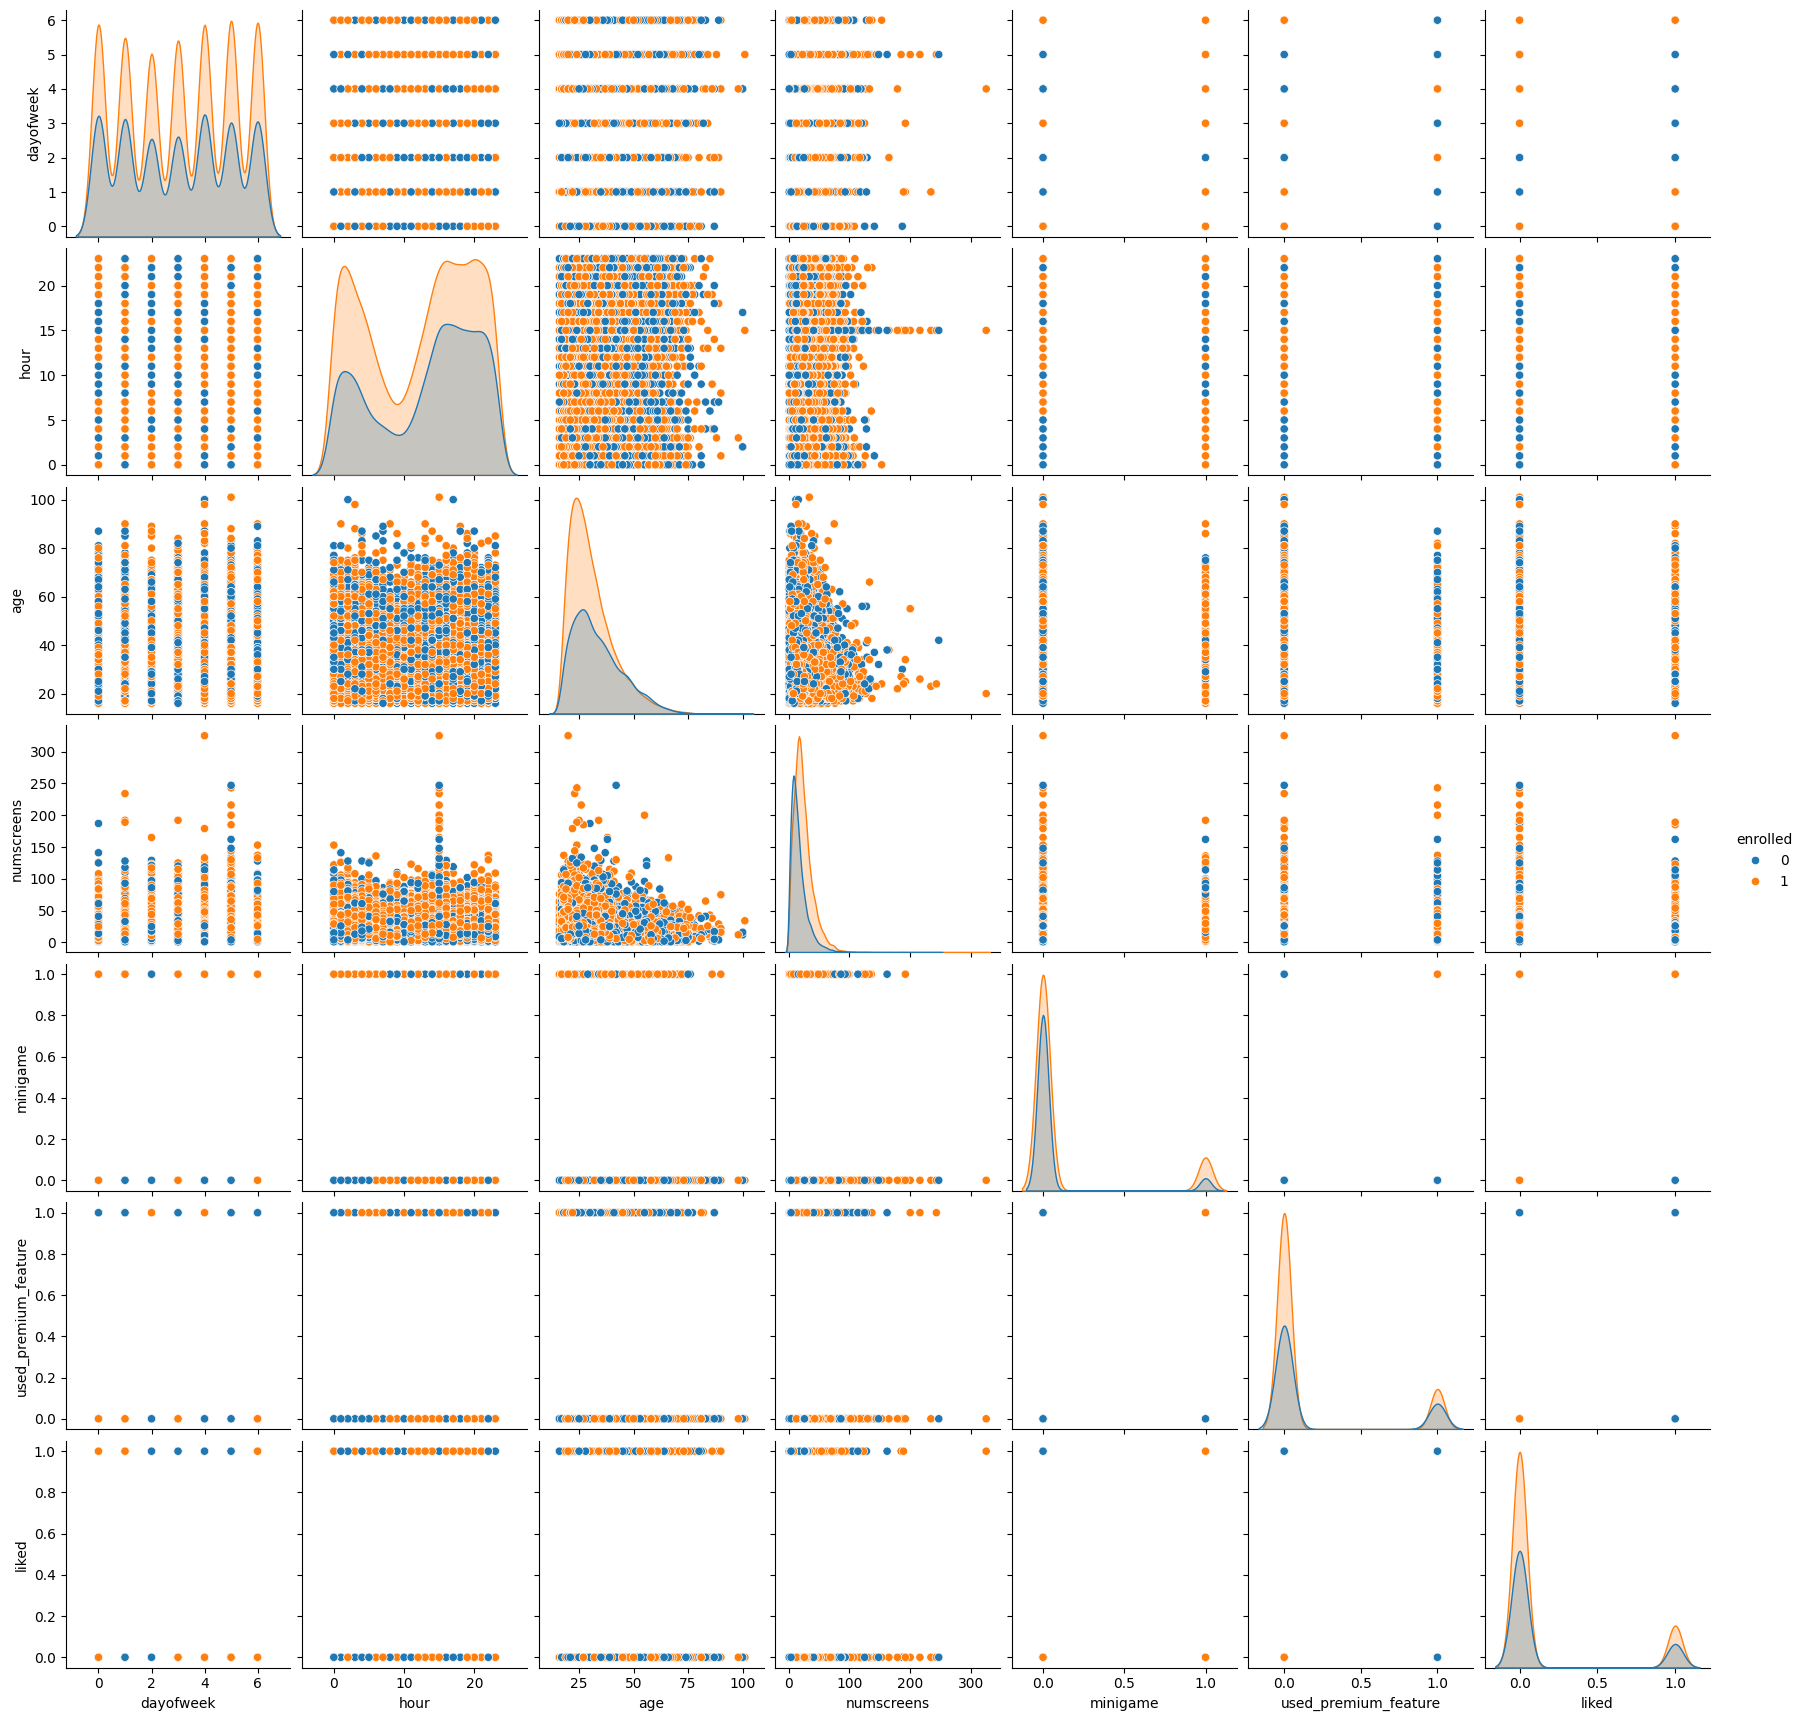

In [25]:
sns.pairplot(data, hue= 'enrolled')

In pair plot we can see, the maximum features have two values like 0 and 1 and orange dots show the enrolled customer’s features. So we visualize the counterplot of enrolled data.

**Countplot of enrolled**

In [26]:
enrolled_col = data['enrolled'].value_counts().reset_index()
enrolled_col

,index,enrolled
0,1,31074
1,0,18926


Text(0.5, 1.0, 'Count of Enrolled Users')

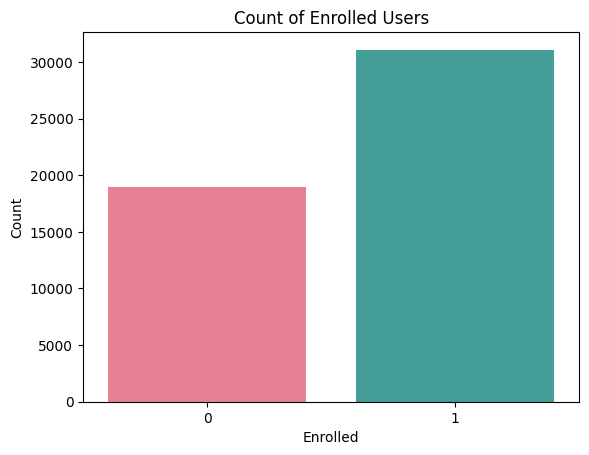

In [27]:
sns.barplot(data= enrolled_col, x= 'index', y= 'enrolled', palette= 'husl')
plt.xlabel('Enrolled')
plt.ylabel('Count')
plt.title('Count of Enrolled Users')

In [28]:
print('No of enrolled users are =', data.enrolled.sum(), 'out of', data.shape[0])
print('No of users not enrolled are =', data.shape[0] - data.enrolled.sum(), 'out of', data.shape[0])

No of enrolled users are = 31074 out of 50000
No of users not enrolled are = 18926 out of 50000


**Histogram for each feature**

In [29]:
features= data.columns

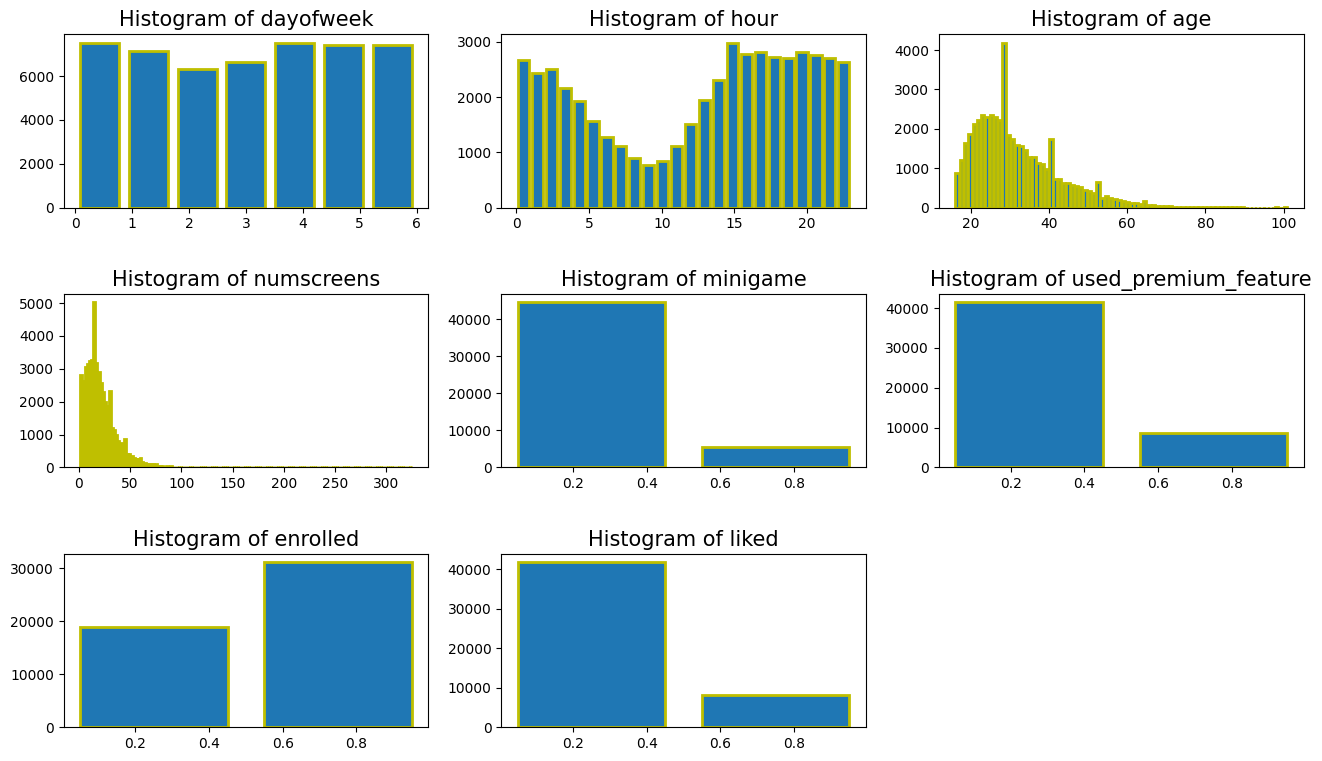

In [30]:
# plot histogram

plt.figure(figsize=(16,9))                                                                # figure size in ratio 16:9                                                                  # list of columns name
for i,j in enumerate(features):
  plt.subplot(3, 3, i+1)                                                                  # create subplots for histograms
  plt.title('Histogram of {}'.format(j), fontsize=15)                                     # title of histograms
  bins = len(data[j].unique())                                                            # bins for histograms
  plt.hist(data[j], bins= bins, rwidth = 0.8, edgecolor= 'y', linewidth = 2, )            # plot histogram
plt.subplots_adjust(hspace= 0.5)                                                          # space between horizontal axes

In the above histogram, we can see minigame, used_primium_feature, enrolled, and like they have only two values and how they distributed.

The histogram of ‘dayofweek’ shows, on Tuesday and Wednesday slightly fewer customer registered the app as compared to other day of the week.

The histogram of ‘hour’ shows the less customer register on the app around 8 to 11 AM.

The ‘age’ histogram shows, the maximum customers are younger.

The ‘numsreens’ histogram shows the few customers saw more than 40 screens.

**Correlation BarPlot with 'enrolled' feature**

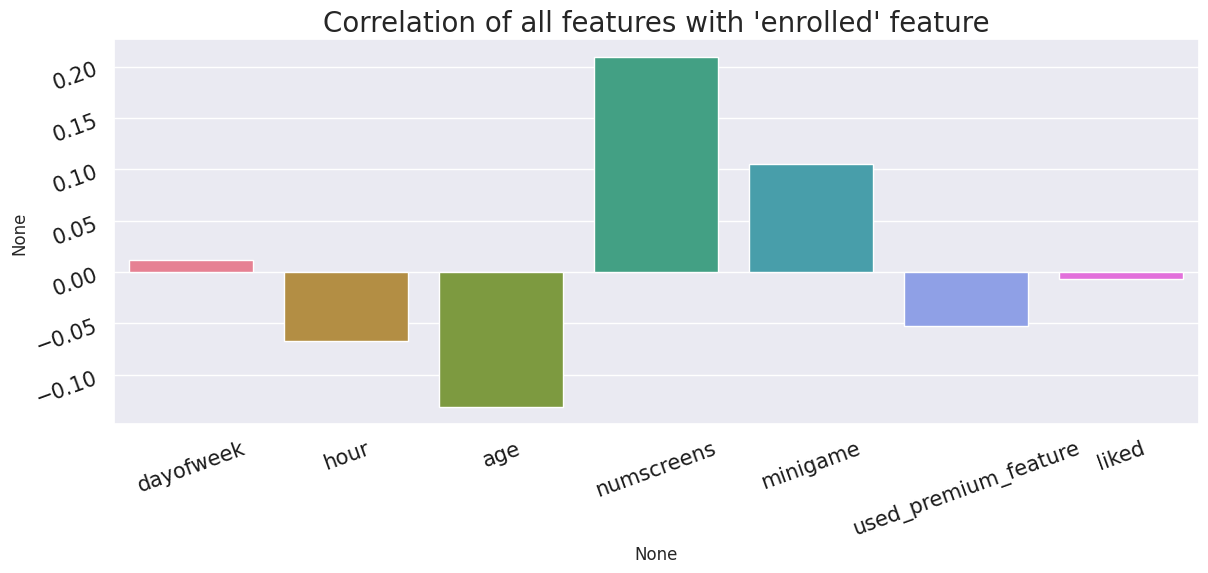

In [31]:
sns.set()                                                     # set background dark grid
plt.figure(figsize = (14,5))
plt.title("Correlation of all features with 'enrolled' feature", fontsize= 20)
new_data = data.drop(['enrolled'], axis=1)
ax = sns.barplot(x = new_data.columns, y = new_data.corrwith(data['enrolled']), palette = 'husl')
ax.tick_params(labelsize= 15, labelrotation= 20, labelcolor = 'k')

We saw the heatmap correlation matrix but this was not showing correlation clearly but you can easily understand which feature is how much correlated with ‘enrolled’ feature using the above barplot.

The ‘numscreens’ and ‘minigame’ is strongly positively correlated with ‘enrolled’ feature than other feature.

The ‘hour’, ‘age’ and ‘used_premium_feature’ are strongly negatively correlated with the ‘enrolled’ feature.

**Time Taken to Enrolled**

In [32]:
#  how much time the customer takes to get enrolled in the premium feature app after registration

df['time_to_enroll'] = (df['enrolled_date'] - df['first_open']).astype('timedelta64[h]')
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,time_to_enroll
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


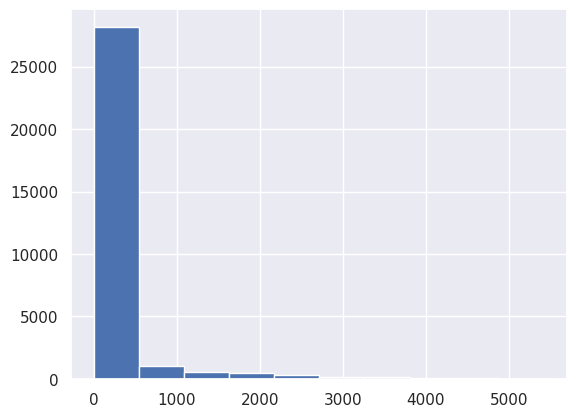

In [33]:
plt.hist(df['time_to_enroll'].dropna())
plt.show()

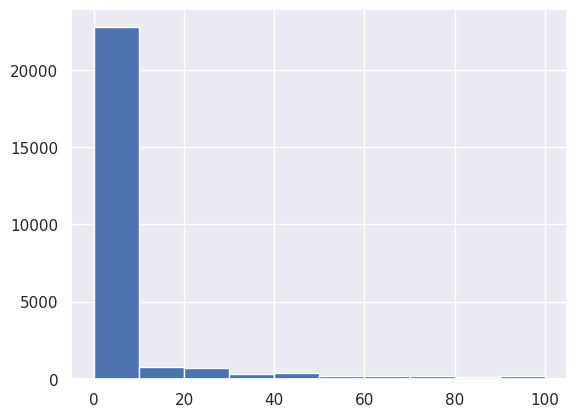

In [34]:
# let’s try to show the distribution in range 0 to 100 hours.

plt.hist(df['time_to_enroll'].dropna(), range= (0,100))
plt.show()

The maximum customers have enrolled the app in 10 hours from the registration.

# **Feature Selection**

In [35]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,time_to_enroll
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


**We are considering those customers have enrolled after 48 hours as 0.**

In [36]:
df.loc[df['time_to_enroll'] > 48, 'enrolled'] == 0
df.head(5)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,time_to_enroll
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


Drop some ‘time_to_enrolled’, ‘enrolled_date’, ‘first_open’ feature they are not strongly correlated to the result.

In [37]:
df.drop(columns = ['time_to_enroll', 'enrolled_date', 'first_open'], inplace=True)

**Top Screen Values in another dataset**

In [38]:
top_screen_values = df_screen.top_screens.values
top_screen_values

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [39]:
# No of different screen

len(top_screen_values)

58

In [40]:
type(top_screen_values)

numpy.ndarray

In [41]:
# make a copy of the data

new_df = df.copy()

In [42]:
# Add ‘,’ at the end of each string of ‘screen_list’ for further operation.

new_df['screen_list'] = new_df['screen_list'].astype(str) + ','

The ‘Screen_list’ contains string values but we can’t use it directly.

So to solve this problem we are taking each screen name from ‘df_screen’ and append as a column by the same name to ‘df’.

Then check this screen name is available in ‘screen_list’ if it is available then add value 1 else 0 in the appended column.

In [43]:
for screen_name in top_screen_values:
  new_df[screen_name] = new_df['screen_list'].str.contains(screen_name).astype(int)
  new_df['screen_list'] = new_df['screen_list'].str.replace(screen_name + ',', ' ')

In [44]:
new_df.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen, product_review,ScanPreview, Veri...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review, Referral...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen, ScanPreview, VerifySSN, Home, S...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [45]:
new_df['screen_list']

0         joinscreen, product_review,ScanPreview,  Veri...
1        joinscreen,product_review,product_review2,Scan...
2                                                         
3        product_review,Home,product_review,   Referral...
4         joinscreen,  ScanPreview, VerifySSN,  Home, S...
                               ...                        
49995     Home,ScanPreview, VerifySSN,  product_review,...
49996                                               Home, 
49997    joinscreen,product_review,product_review2,Scan...
49998     Home,product_review,product_review,product_re...
49999    product_review,ScanPreview,  ProfileVerifySSN,...
Name: screen_list, Length: 50000, dtype: object

In [46]:
new_df.shape

(50000, 68)

You can see the shape of the dataset has changed from 13 to 68 columns.

In [47]:
# remaining screen in screen_list[0]

new_df.loc[0, 'screen_list']

' joinscreen, product_review,ScanPreview,  VerifyToken,ProfileVerifySSN, Settings,ForgotPassword, '

In [48]:
new_df['screen_list'].str.count(',').head()

0     7
1     5
2     0
3     6
4    10
Name: screen_list, dtype: int64

In [49]:
# Count remain screen list and store counted number in 'remain_screen'

new_df['remain_screen'] = df['screen_list'].str.count(',')
new_df.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen
0,235136,3,2,23,"joinscreen, product_review,ScanPreview, Veri...",15,0,0,0,0,...,1,0,0,0,0,0,0,0,0,12
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,2
3,234192,4,16,28,"product_review,Home,product_review, Referral...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,16
4,51549,1,18,31,"joinscreen, ScanPreview, VerifySSN, Home, S...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,18


**Drop ‘screen_list’ column**

In [50]:
new_df.drop(columns = ['screen_list'], inplace= True)
new_df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,12
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,16
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,18


In [51]:
# Total columns

print('Total number of columns in the dataset is: ', new_df.shape[1], '\n')
new_df.columns

Total number of columns in the dataset is:  68 



Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

All the saving screens correlated with each other that’s we are taking the sum of all saving screens in each row and store in a single row for all customers.

In [52]:
saving_screens = ['Saving1', 'Saving2', 'Saving2Amount', 'Saving4', 'Saving5', 'Saving6', 'Saving7', 'Saving8', 'Saving9', 'Saving10']
new_df['saving_screens_count'] = new_df[saving_screens].sum(axis= 1)
new_df.drop(columns = saving_screens, axis= 1, inplace= True)

All the credit screens correlated with each other that’s we are taking the sum of all credit screens in each row and store in a single row for all customers.

In [53]:
credit_screens = ['Credit1', 'Credit2', 'Credit3', 'Credit3Container', 'Credit3Dashboard']
new_df['credut_screens_count'] = new_df[credit_screens].sum(axis= 1)
new_df.drop(columns = credit_screens, axis= 1, inplace= True)

All the cc screens correlated with each other that’s we are taking the sum of all cc screens in each row and store in a single row for all customers.

In [54]:
cc_screens = ['CC1', 'CC1Category', 'CC3']
new_df['cc_screens_count'] = new_df[cc_screens].sum(axis= 1)
new_df.drop(columns = cc_screens, axis= 1, inplace= True)

All the loan screens correlated with each other that’s we are taking the sum of all loan screens in each row and store in a single row for all customers.

In [55]:
loan_screens = ['Loan', 'Loan2', 'Loan3', 'Loan4']
new_df['loan_screens_count'] = new_df[loan_screens].sum(axis= 1)
new_df.drop(columns = loan_screens, axis= 1, inplace= True)

In [56]:
new_df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen,saving_screens_count,credut_screens_count,cc_screens_count,loan_screens_count
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,12,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,10,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,2,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,16,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,18,0,2,0,1


In [57]:
new_df.shape

(50000, 50)

In [58]:
# Information about the complete data

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int64
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int64
 10  Institutions             50000 non-null  int64
 11  VerifyPhone              50000 non-null  int64
 12  BankVerification         50000 non-null  int64
 13  VerifyDateOfBirth        50000 non-null  int64
 14  ProfilePage              50000 non-null  int64
 15  Ve

In [59]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
user,50000.0,186889.72990,107768.520361,13.0,93526.75,187193.5,279984.25,373662.0
dayofweek,50000.0,3.02986,2.031997,0.0,1.00,3.0,5.00,6.0
hour,50000.0,12.55722,7.438072,0.0,5.00,14.0,19.00,23.0
age,50000.0,31.72436,10.803310,16.0,24.00,29.0,37.00,101.0
numscreens,50000.0,21.09590,15.728812,1.0,10.00,18.0,28.00,325.0
minigame,50000.0,0.10782,0.310156,0.0,0.00,0.0,0.00,1.0
used_premium_feature,50000.0,0.17202,0.377402,0.0,0.00,0.0,0.00,1.0
enrolled,50000.0,0.62148,0.485023,0.0,0.00,1.0,1.00,1.0
liked,50000.0,0.16500,0.371184,0.0,0.00,0.0,0.00,1.0
location,50000.0,0.51776,0.499689,0.0,0.00,1.0,1.00,1.0


**HeatMap with new clean data**

<Axes: >

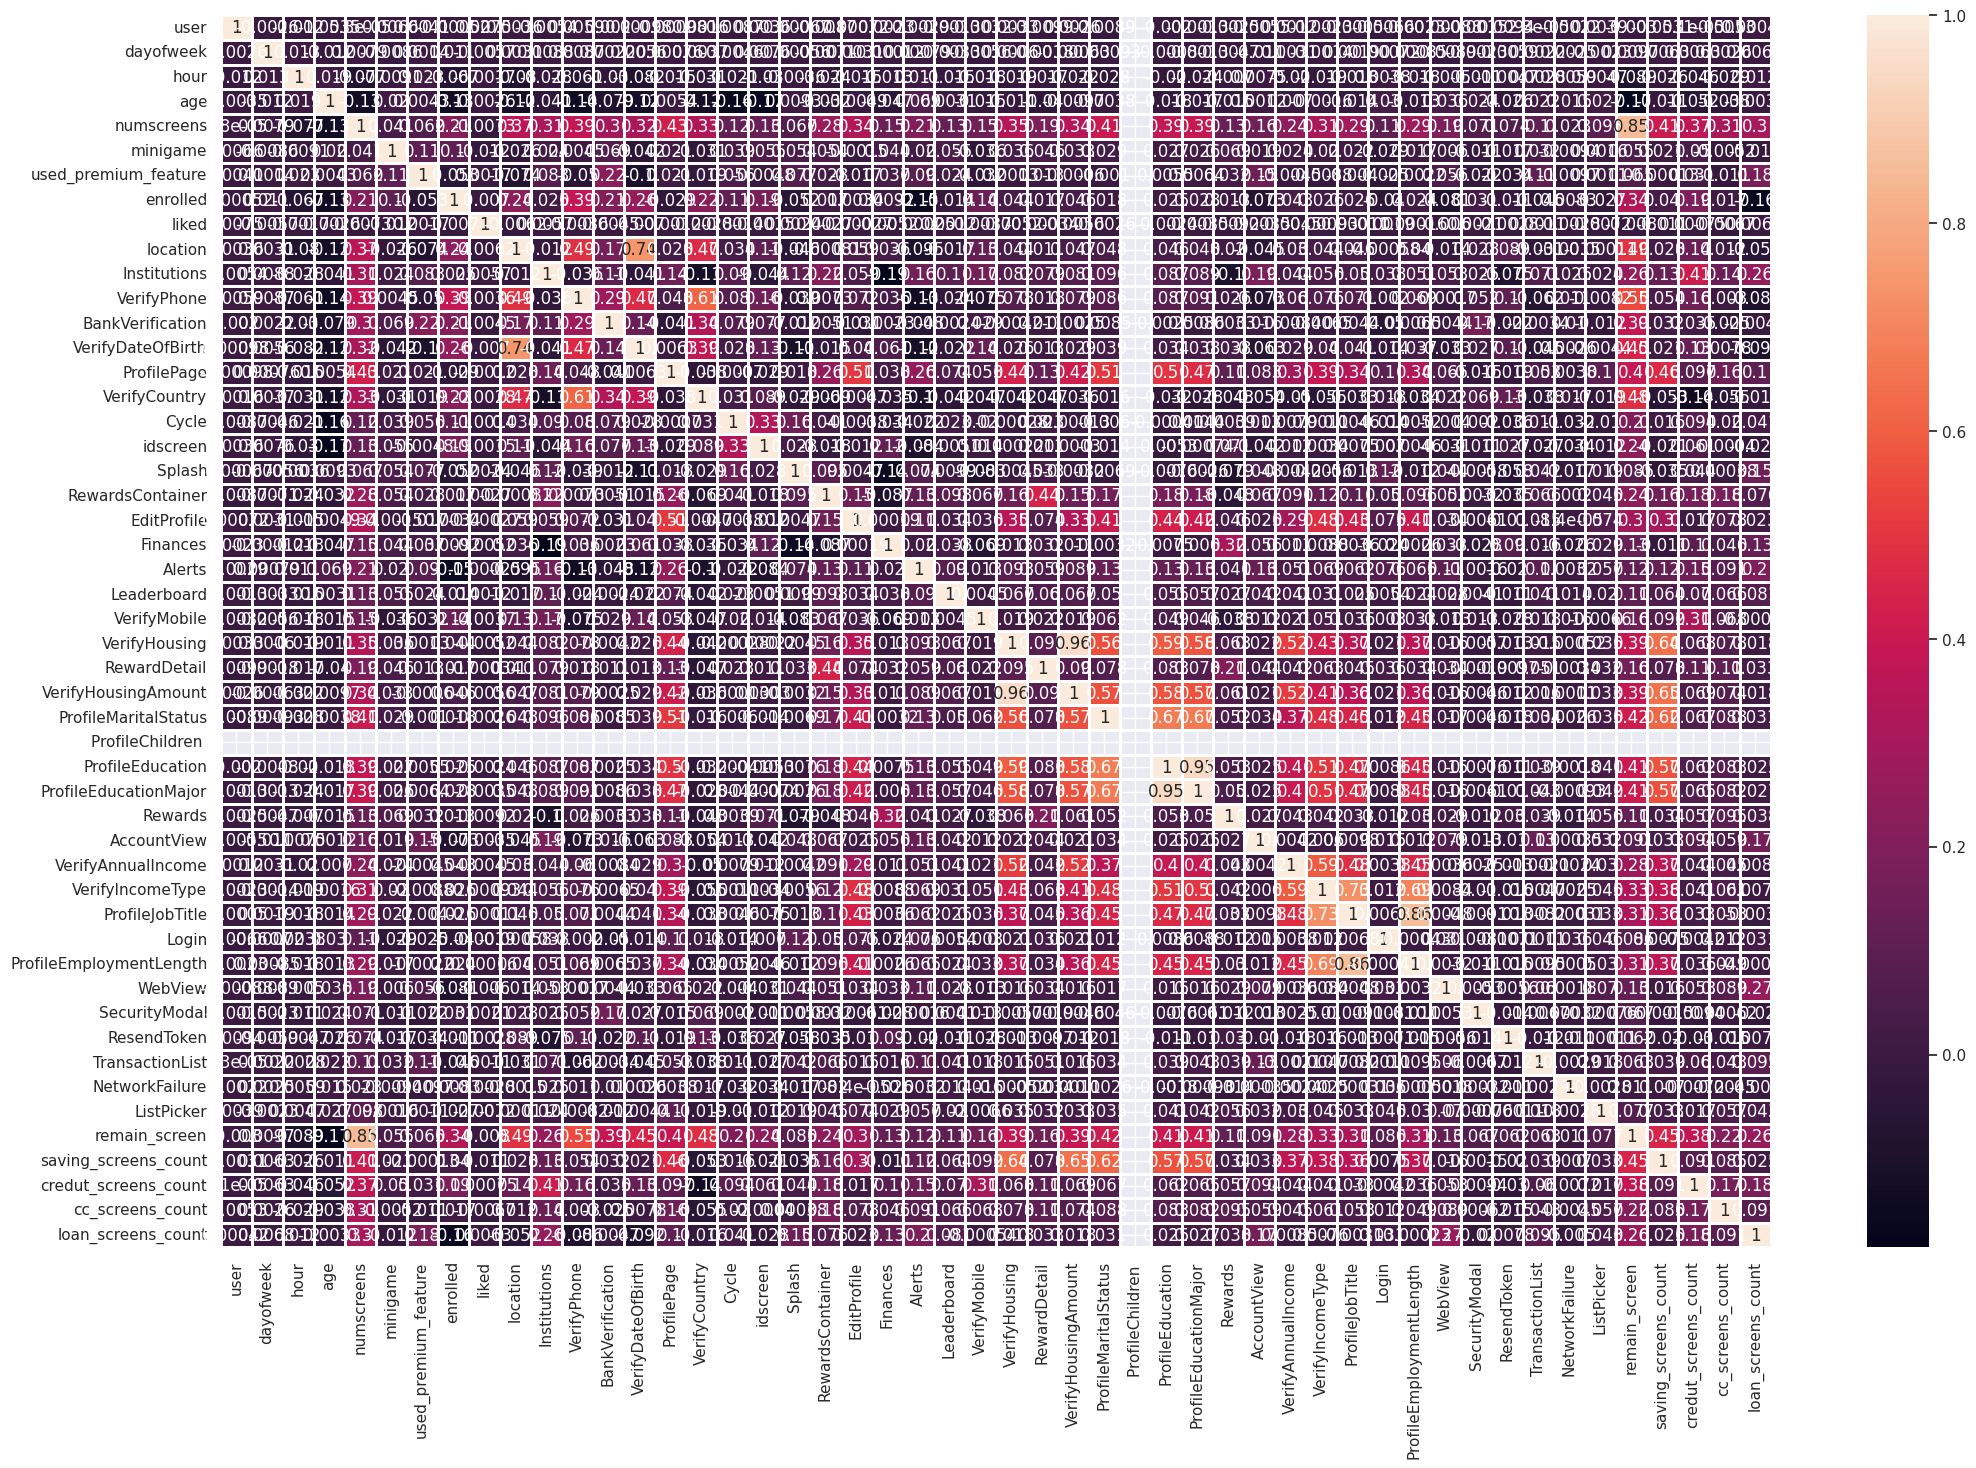

In [60]:
plt.figure(figsize= (25,16))
sns.heatmap(new_df.corr(),annot= True, linewidth= 2)

'ProfileChildren' is giving us blank value

In [61]:
new_df['ProfileChildren '].unique()

array([0])

In [62]:
corr_matrix = new_df.corr()
corr_matrix['ProfileChildren ']

user                      NaN
dayofweek                 NaN
hour                      NaN
age                       NaN
numscreens                NaN
minigame                  NaN
used_premium_feature      NaN
enrolled                  NaN
liked                     NaN
location                  NaN
Institutions              NaN
VerifyPhone               NaN
BankVerification          NaN
VerifyDateOfBirth         NaN
ProfilePage               NaN
VerifyCountry             NaN
Cycle                     NaN
idscreen                  NaN
Splash                    NaN
RewardsContainer          NaN
EditProfile               NaN
Finances                  NaN
Alerts                    NaN
Leaderboard               NaN
VerifyMobile              NaN
VerifyHousing             NaN
RewardDetail              NaN
VerifyHousingAmount       NaN
ProfileMaritalStatus      NaN
ProfileChildren           NaN
ProfileEducation          NaN
ProfileEducationMajor     NaN
Rewards                   NaN
AccountVie

'ProfileChildren' is not correlated with any other features.

# **Data Preprocessing**

In [63]:
cleaned_data = new_df

In [64]:
cleaned_data.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'remain_screen',
       'saving_screens_count', 'credut_screens_count', 'cc_screens_count',
       'loan_screens_count'],
      dtype='object')

**Split dataset in Train and Test set**

In [65]:
target = cleaned_data['enrolled']
data = cleaned_data.drop(columns= 'enrolled', axis=1)

In [66]:
target.head()

0    0
1    0
2    0
3    1
4    1
Name: enrolled, dtype: int64

In [67]:
data.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen,saving_screens_count,credut_screens_count,cc_screens_count,loan_screens_count
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,12,0,0,0,1
1,333588,6,1,24,13,0,0,0,1,1,...,0,0,0,0,0,10,0,0,0,1
2,254414,1,19,23,3,0,1,1,0,0,...,0,0,0,0,0,2,0,0,0,1
3,234192,4,16,28,40,0,0,0,1,0,...,0,0,0,0,0,16,0,3,0,1
4,51549,1,18,31,32,0,0,1,0,1,...,0,0,0,0,0,18,0,2,0,1


In [68]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size= 0.2, random_state= 42)

In [69]:
print('shape of x_train = ', x_train.shape)
print('shape of x_test = ', x_test.shape)
print('shape of y_train = ', y_train.shape)
print('shape of y_test = ', y_test.shape)

shape of x_train =  (40000, 49)
shape of x_test =  (10000, 49)
shape of y_train =  (40000,)
shape of y_test =  (10000,)


In [70]:
# Take user_id in another variable for further processing

train_userid = x_train['user']
x_train.drop(columns = 'user', inplace= True)
test_userid = x_test['user']
x_test.drop(columns = 'user', inplace= True)

In [71]:
print('shape of x_train = ', x_train.shape)
print('shape of x_test = ', x_test.shape)
print('shape of train_userid = ', train_userid.shape)
print('shape of test_userid = ', test_userid.shape)

shape of x_train =  (40000, 48)
shape of x_test =  (10000, 48)
shape of train_userid =  (40000,)
shape of test_userid =  (10000,)


# **Feature Scaling**

In [72]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

# **Model Building**

The target variable is categorical type 0 and 1, so we have to use supervised classification algorithms.

To build the best model, we have to train and test the dataset with multiple Machine Learning algorithms then we can find the best ML model. So let’s try.

**Decision Tree**

In [73]:
# Decision Tree Classifier

dtree= DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
dtree.fit(x_train, y_train)
dtree_predict= dtree.predict(x_test)
print(f'accuracy of the model is {accuracy_score(y_test, dtree_predict)}')
print(f'precision of the model is {precision_score(y_test, dtree_predict)}')
print(f'recall score of the model is {recall_score(y_test, dtree_predict)}')
print(f'f1 score of the model is {f1_score(y_test, dtree_predict)}')

accuracy of the model is 0.7121
precision of the model is 0.7595602294455067
recall score of the model is 0.7767638911520287
f1 score of the model is 0.7680657375332313


In [74]:
# Train with standard Scaling dataset

dtree_sc= DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
dtree_sc.fit(x_train_sc, y_train)
dtree_predict_sc= dtree_sc.predict(x_test_sc)
print(f'accuracy of the model is {accuracy_score(y_test, dtree_predict_sc)}')
print(f'precision of the model is {precision_score(y_test, dtree_predict_sc)}')
print(f'recall score of the model is {recall_score(y_test, dtree_predict_sc)}')
print(f'f1 score of the model is {f1_score(y_test, dtree_predict_sc)}')

accuracy of the model is 0.712
precision of the model is 0.7599361532322426
recall score of the model is 0.7757862147629134
f1 score of the model is 0.7677793904208998


**KNN**

In [75]:
# K Nearest Neighbors

knn= KNeighborsClassifier(n_neighbors= 5, metric= 'minkowski', p=2,)
knn.fit(x_train, y_train)
knn_predict= knn.predict(x_test)
print(f'accuracy of the model is {accuracy_score(y_test, knn_predict)}')
print(f'precision of the model is {precision_score(y_test, knn_predict)}')
print(f'recall score of the model is {recall_score(y_test, knn_predict)}')
print(f'f1 score of the model is {f1_score(y_test, knn_predict)}')

accuracy of the model is 0.6832
precision of the model is 0.7135663933247015
recall score of the model is 0.8082124816685677
f1 score of the model is 0.7579462102689487


In [76]:
# Train with standard Scaling dataset

knn_sc= KNeighborsClassifier(n_neighbors= 5, metric= 'minkowski', p=2,)
knn_sc.fit(x_train_sc, y_train)
knn_predict_sc= knn_sc.predict(x_test_sc)
print(f'accuracy of the model is {accuracy_score(y_test, knn_predict_sc)}')
print(f'precision of the model is {precision_score(y_test, knn_predict_sc)}')
print(f'recall score of the model is {recall_score(y_test, knn_predict_sc)}')
print(f'f1 score of the model is {f1_score(y_test, knn_predict_sc)}')

accuracy of the model is 0.734
precision of the model is 0.7645716024958149
recall score of the model is 0.8186410298191299
f1 score of the model is 0.7906830343090966


**Naive Bayes**

In [77]:
# Naive Bayes

naive= GaussianNB()
naive.fit(x_train, y_train)
naive_predict= naive.predict(x_test)
print(f'accuracy of the model is {accuracy_score(y_test, naive_predict)}')
print(f'precision of the model is {precision_score(y_test, naive_predict)}')
print(f'recall score of the model is {recall_score(y_test, naive_predict)}')
print(f'f1 score of the model is {f1_score(y_test, naive_predict)}')

accuracy of the model is 0.6922
precision of the model is 0.8149063207741404
recall score of the model is 0.6449405246863288
f1 score of the model is 0.7200291067855193


In [78]:
# Train with standard Scaling dataset

naive_sc= GaussianNB()
naive_sc.fit(x_train_sc, y_train)
naive_predict_sc= naive_sc.predict(x_test_sc)
print(f'accuracy of the model is {accuracy_score(y_test, naive_predict_sc)}')
print(f'precision of the model is {precision_score(y_test, naive_predict_sc)}')
print(f'recall score of the model is {recall_score(y_test, naive_predict_sc)}')
print(f'f1 score of the model is {f1_score(y_test, naive_predict_sc)}')

accuracy of the model is 0.6922
precision of the model is 0.8149063207741404
recall score of the model is 0.6449405246863288
f1 score of the model is 0.7200291067855193


**Random Forest**

In [79]:
# Random Forest Classifier

rf= RandomForestClassifier(n_estimators= 10, criterion= 'entropy', random_state= 0)
rf.fit(x_train, y_train)
rf_predict= rf.predict(x_test)
print(f'accuracy of the model is {accuracy_score(y_test, rf_predict)}')
print(f'precision of the model is {precision_score(y_test, rf_predict)}')
print(f'recall score of the model is {recall_score(y_test, rf_predict)}')
print(f'f1 score of the model is {f1_score(y_test, rf_predict)}')

accuracy of the model is 0.7555
precision of the model is 0.8048216644649934
recall score of the model is 0.7941991200912498
f1 score of the model is 0.7994751086689085


In [80]:
# Train with standard Scaling dataset

rf_sc= RandomForestClassifier(n_estimators= 10, criterion= 'entropy', random_state= 0)
rf_sc.fit(x_train_sc, y_train)
rf_predict_sc= rf_sc.predict(x_test_sc)
print(f'accuracy of the model is {accuracy_score(y_test, rf_predict_sc)}')
print(f'precision of the model is {precision_score(y_test, rf_predict_sc)}')
print(f'recall score of the model is {recall_score(y_test, rf_predict_sc)}')
print(f'f1 score of the model is {f1_score(y_test, rf_predict_sc)}')

accuracy of the model is 0.7567
precision of the model is 0.8059134456557648
recall score of the model is 0.7950138504155124
f1 score of the model is 0.8004265441719302


**Logistic regression**

In [81]:
# Logistic Regression

lr = LogisticRegression(random_state= 0)
lr.fit(x_train, y_train)
lr_predict= lr.predict(x_test)
print(f'accuracy of the model is {accuracy_score(y_test, lr_predict)}')
print(f'precision of the model is {precision_score(y_test, lr_predict)}')
print(f'recall score of the model is {recall_score(y_test, lr_predict)}')
print(f'f1 score of the model is {f1_score(y_test, lr_predict)}')

accuracy of the model is 0.7536
precision of the model is 0.7759579263711495
recall score of the model is 0.8414534788984847
f1 score of the model is 0.8073796122576611


In [82]:
# Train with standard Scaling dataset

lr_sc = LogisticRegression(random_state= 0)
lr_sc.fit(x_train_sc, y_train)
lr_predict_sc= lr_sc.predict(x_test_sc)
print(f'accuracy of the model is {accuracy_score(y_test, lr_predict_sc)}')
print(f'precision of the model is {precision_score(y_test, lr_predict_sc)}')
print(f'recall score of the model is {recall_score(y_test, lr_predict_sc)}')
print(f'f1 score of the model is {f1_score(y_test, lr_predict_sc)}')

accuracy of the model is 0.7525
precision of the model is 0.7760024118179077
recall score of the model is 0.8388463418608441
f1 score of the model is 0.806201550387597


**Support Vector Machine**

In [83]:
# Support Vector Machine

svc= SVC()
svc.fit(x_train, y_train)
svc_predict= svc.predict(x_test)
print(f'accuracy of the model is {accuracy_score(y_test, svc_predict)}')
print(f'precision of the model is {precision_score(y_test, svc_predict)}')
print(f'recall score of the model is {recall_score(y_test, svc_predict)}')
print(f'f1 score of the model is {f1_score(y_test, svc_predict)}')

accuracy of the model is 0.7376
precision of the model is 0.7625168136302496
recall score of the model is 0.8313508228776275
f1 score of the model is 0.7954474586841286


In [84]:
# Train with standard Scaling dataset

svc_sc= SVC()
svc_sc.fit(x_train_sc, y_train)
svc_predict_sc= svc_sc.predict(x_test_sc)
print(f'accuracy of the model is {accuracy_score(y_test, svc_predict_sc)}')
print(f'precision of the model is {precision_score(y_test, svc_predict_sc)}')
print(f'recall score of the model is {recall_score(y_test, svc_predict_sc)}')
print(f'f1 score of the model is {f1_score(y_test, svc_predict_sc)}')

accuracy of the model is 0.7769
precision of the model is 0.796718322698268
recall score of the model is 0.8544891640866873
f1 score of the model is 0.8245931283905967


**XGBoost**

In [85]:
# XGBoost

xg= XGBClassifier()
xg.fit(x_train, y_train)
xg_predict= xg.predict(x_test)
print(f'accuracy of the model is {accuracy_score(y_test, xg_predict)}')
print(f'precision of the model is {precision_score(y_test, xg_predict)}')
print(f'recall score of the model is {recall_score(y_test, xg_predict)}')
print(f'f1 score of the model is {f1_score(y_test, xg_predict)}')

accuracy of the model is 0.7805
precision of the model is 0.8052973977695167
recall score of the model is 0.8471565911683233
f1 score of the model is 0.8256968156912571


In [86]:
# Train with standard Scaling dataset

xg_sc= XGBClassifier()
xg_sc.fit(x_train_sc, y_train)
xg_predict_sc= xg_sc.predict(x_test_sc)
print(f'accuracy of the model is {accuracy_score(y_test, xg_predict_sc)}')
print(f'precision of the model is {precision_score(y_test, xg_predict_sc)}')
print(f'recall score of the model is {recall_score(y_test, xg_predict_sc)}')
print(f'f1 score of the model is {f1_score(y_test, xg_predict_sc)}')

accuracy of the model is 0.7805
precision of the model is 0.8052973977695167
recall score of the model is 0.8471565911683233
f1 score of the model is 0.8256968156912571


The result of 'XGBoost' is better in comparison to other classification models.

So let's do hyper parameter tuning of XGBoost Model and see if we can increase the accuracy, precision, recall and f1 score.

**XGBoost Hyper Parameter Tuning**

In [92]:
# XGBoost Parameter Tuning

import time
start_time = time.time()
params = {'max_depth': [3,5,6,10,15,20], 'learing_rate': [0.01, 0.1, 0.2, 0.3], 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1], 'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 'n_estimators': [100, 500, 1000]}
xg_pt = XGBClassifier(seed= 20)
rscv = RandomizedSearchCV(estimator = xg_pt, param_distributions= params, scoring= 'neg_mean_squared_error', n_iter= 25, cv= 5, verbose= 1)
rscv.fit(x_train, y_train)
xg_pred_pt = rscv.predict(x_test)
print('Time taken to training using randomized search: ', time.time()- start_time)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Time taken to training using randomized search:  634.3712031841278


In [93]:
# Best Parameters for the model
rscv.best_params_

{'subsample': 1,
 'n_estimators': 500,
 'max_depth': 3,
 'learing_rate': 0.3,
 'colsample_bytree': 0.7,
 'colsample_bylevel': 0.9}

In [94]:
# Let's use these best parameters to train our model
xg_pt = XGBClassifier(n_estimators= 500, subsample= 1,learning_rate= 0.3, colsample_bytree= 0.7,max_depth= 3,colsample_bylevel= 0.9, seed= 20)
xg_pt.fit(x_train, y_train)
xg_predict_pt = xg_pt.predict(x_test)

In [95]:
# Get Estimated Metrics
print(f'accuracy of the model is {accuracy_score(y_test, xg_predict_pt)}')
print(f'precision of the model is {precision_score(y_test, xg_predict_pt)}')
print(f'recall score of the model is {recall_score(y_test, xg_predict_pt)}')
print(f'f1 score of the model is {f1_score(y_test, xg_predict_pt)}')

accuracy of the model is 0.7802
precision of the model is 0.8029533917858791
recall score of the model is 0.8505784585302265
f1 score of the model is 0.8260800759613863


In [96]:
# Train with XGBoost Parameter Tuning with standard Scaling dataset

xg_pt_sc= XGBClassifier(learning_rate= 0.01, n_estimators= 5000, max_depth= 4, min_child_weight= 6, gamma= 0, subsample= 0.8, colsample_bytree= 0.8, reg_alpha= 0.005, objective= 'binary:logistic', nthread= 4, scale_pos_weight= 1, seed= 27)
xg_pt_sc.fit(x_train_sc, y_train)
xg_predict_pt_sc= xg_pt_sc.predict(x_test_sc)
print(f'accuracy of the model is {accuracy_score(y_test, xg_predict_pt_sc)}')
print(f'precision of the model is {precision_score(y_test, xg_predict_pt_sc)}')
print(f'recall score of the model is {recall_score(y_test, xg_predict_pt_sc)}')
print(f'f1 score of the model is {f1_score(y_test, xg_predict_pt_sc)}')

accuracy of the model is 0.7837
precision of the model is 0.8055043050430505
recall score of the model is 0.8536744337624247
f1 score of the model is 0.8288901194525748


In [97]:
import time
start_time = time.time()
params = {'max_depth': [3,5,6,10,15,20], 'learing_rate': [0.01, 0.1, 0.2, 0.3], 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1], 'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 'n_estimators': [100, 500, 1000]}
xg_pt_sc = XGBClassifier(seed= 20)
rscv = RandomizedSearchCV(estimator = xg_pt_sc, param_distributions= params, scoring= 'neg_mean_squared_error', n_iter= 25, cv= 5, verbose= 1)
rscv.fit(x_train_sc, y_train)
xg_pred_pt_sc = rscv.predict(x_test_sc)
print('Time taken to training using randomized search: ', time.time()- start_time)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Time taken to training using randomized search:  499.07501554489136


In [98]:
# Best Parameters for the model
rscv.best_params_

{'subsample': 1,
 'n_estimators': 500,
 'max_depth': 3,
 'learing_rate': 0.2,
 'colsample_bytree': 0.5,
 'colsample_bylevel': 0.9}

In [99]:
# Let's use these best parameters to train our model
xg_pt_sc = XGBClassifier(n_estimators= 500, subsample= 1,learning_rate= 0.2,colsample_bytree= 0.5,max_depth= 3,colsample_bylevel= 0.9, seed= 20)
xg_pt_sc.fit(x_train_sc, y_train)
xg_predict_pt_sc = xg_pt_sc.predict(x_test_sc)

In [100]:
# Get Estimated Metrics
print(f'accuracy of the model is {accuracy_score(y_test, xg_predict_pt_sc)}')
print(f'precision of the model is {precision_score(y_test, xg_predict_pt_sc)}')
print(f'recall score of the model is {recall_score(y_test, xg_predict_pt_sc)}')
print(f'f1 score of the model is {f1_score(y_test, xg_predict_pt_sc)}')

accuracy of the model is 0.7836
precision of the model is 0.8061334566188935
recall score of the model is 0.8523708652436044
f1 score of the model is 0.8286076350388089


**Confusion Matrix**

Text(0.5, 1.0, 'Confusion Matrix')

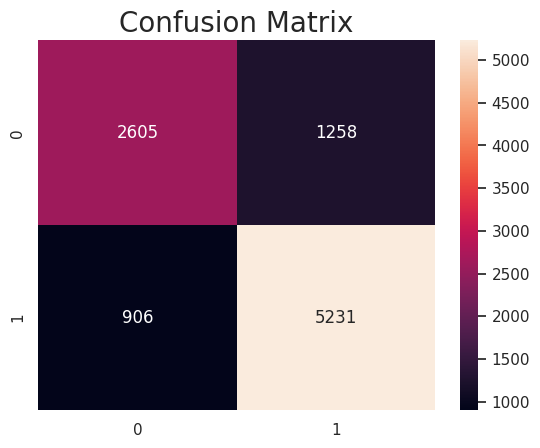

In [101]:
# Confusion Matrix with XGBoost Parameter Tuning

cm_xg_pt_sc = confusion_matrix(y_test, xg_predict_pt_sc)
sns.heatmap(cm_xg_pt_sc, annot= True, fmt= 'g')
plt.title('Confusion Matrix', fontsize= 20)

In [102]:
# Classificaion Report

cr_xg_pt_sc = classification_report(y_test, xg_predict_pt_sc)
print('Classification Report >>> \n', cr_xg_pt_sc)

Classification Report >>> 
               precision    recall  f1-score   support

           0       0.74      0.67      0.71      3863
           1       0.81      0.85      0.83      6137

    accuracy                           0.78     10000
   macro avg       0.77      0.76      0.77     10000
weighted avg       0.78      0.78      0.78     10000



# **Cross-validation of the ML model**

To find whether ML model is overfitted, under fitted or generalize doing cross-validation.

In [106]:
# cross validation

cross_validation= cross_val_score(estimator= xg_pt_sc, X= x_train_sc, y= y_train, cv= 10)
print('Cross validation of XGBoost model = ', cross_validation)
print('Cross validation of XGBoost model (in mean) = ', cross_validation.mean())

Cross validation of XGBoost model =  [0.78    0.78775 0.799   0.78925 0.7835  0.787   0.7905  0.78075 0.78525
 0.781  ]
Cross validation of XGBoost model (in mean) =  0.7864
